# 1.10

### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_delta_t(delta_x, buffer):
    return 0.5 * np.square(delta_x) * buffer

### Initialization

In [2]:
space_steps = 101
    
delta_x = 1/(space_steps - 1)
delta_t = 0.001

time_step_space = 0.3

time_steps = int(np.ceil(time_step_space / delta_t))

current_temperature = np.zeros(space_steps)
next_temperature = np.zeros(space_steps)
plot_data = []

current_temperature[0] = 350
current_temperature[-1] = 250

next_temperature[0] = 350
next_temperature[-1] = 250

alpha = delta_t / delta_x**2

### Heat simulation

In [33]:
for i in range(space_steps - 2):
    j = (i + 1) * delta_x
    current_temperature[i + 1] = 350 - 100 * j + 200 * np.sin(np.pi * j)
    
a = (1 + 2 * alpha) * np.ones(space_steps)
b = -alpha * np.ones(space_steps - 1)
F = np.zeros(space_steps)

F[0] = 350
F[-1] = 250

F = F * alpha + current_temperature

c = np.zeros(space_steps)
c[0] = a[0]
c[-1] = a[-1]

# A = np.diag(b[1:], -1) + np.diag(a) + np.diag(b[:-1], 1)

for i in range(1, space_steps - 2):
    c[i] = a[i] - (np.square(b[i - 1]) / c[i - 1])

# Time-stepping
plot_data = [current_temperature.copy()]
for t in range(time_steps):
    
    for i in range(1, space_steps - 2):
        F[i] = F[i] - (b[i - 1] / c[i - 1]) * F[i - 1] #g and f vector at some point
        
    print(F)
    
    current_temperature[-1] = F[-1] / c[-1]  #setting u is the same as setting current temperature
    
    for i in range(space_steps - 2, 0, -1):
        current_temperature[i] = (F[i] - b[i] * F[i + 1]) / c[i] 
    
    break
    
    plot_data.append(current_temperature.copy())

[3.50000000e+03 1.66666667e+03 1.02639296e+03 6.91562932e+02
 4.84892146e+02 3.46637272e+02 2.50257032e+02 1.81603144e+02
 1.32139065e+02 9.62849848e+01 7.02125427e+01 5.12207161e+01
 3.73740027e+01 2.72736400e+01 1.99041193e+01 1.45263624e+01
 1.06017672e+01 7.73755301e+00 5.64717354e+00 4.12154230e+00
 3.00807729e+00 2.19542468e+00 1.60231634e+00 1.16944035e+00
 8.53508667e-01 6.22927956e-01 4.54640083e-01 3.31816234e-01
 2.42174015e-01 1.76749199e-01 1.28999305e-01 9.41493412e-02
 6.87143117e-02 5.01507136e-02 3.66021868e-02 2.67138786e-02
 1.94969584e-02 1.42297340e-02 1.03854829e-02 7.57978021e-03
 5.53205550e-03 4.03753634e-03 2.94677082e-03 2.15068238e-03
 1.56966217e-03 1.14560819e-03 8.36115018e-04 6.10233352e-04
 4.45375022e-04 3.25054193e-04 2.37238783e-04 1.73147252e-04
 1.26370447e-04 9.22306855e-05 6.73139929e-05 4.91286995e-05
 3.58562762e-05 2.61694804e-05 1.90996327e-05 1.39397483e-05
 1.01738387e-05 7.42531298e-06 5.41931856e-06 3.95525598e-06
 2.88671901e-06 2.106853

/var/folders/jf/yb3w699x1lz9wd4jsz3p9btc0000gn/T/ipykernel_2418/3840819483.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  current_temperature[i] = (F[i] - b[i] * F[i + 1]) / c[i]


### 3D Plot

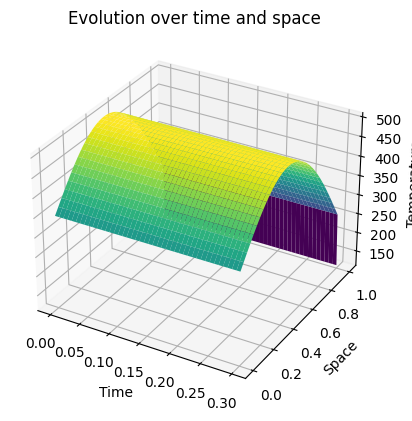

In [34]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, time_step_space, time_steps + 1)

Time, Space = np.meshgrid(time, space)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Time, Space, data_np, cmap='viridis') 

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Temperature')
ax.set_title('Evolution over time and space')
plt.show()

### 2D Plot

IndexError: index 50 is out of bounds for axis 1 with size 1

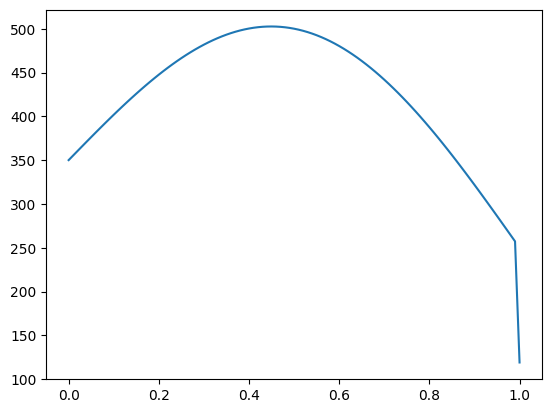

In [35]:
#plotting
data_np = np.array(plot_data)
data_np = data_np.T 

space = np.linspace(0, 1, space_steps)
time = np.linspace(0, 1, time_steps)

# Plotting for discrete timestamp values
for t in range(0, time_steps, 50):  # Change the step size as per your requirement
    plt.plot(space, data_np[:, t], label=f'Time={t}')

plt.xlabel('Space')
plt.ylabel('Value')
plt.title('Evolution over space')
plt.legend()
plt.show()